In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from matplotlib.pyplot import figure
import numpy as np

In [3]:
df = pd.read_pickle("data/dataframe")

In [ ]:
agriculture = range(1, 3)
industry = range(5, 39)
construction = range(41, 43)
comeercial = range(45, 63)
servicies = range(64, 82)
otherServicies= range(83, 99)

In [60]:
df["14VA"] = df["14Productivity"] * df["14TAH082"] *1000

In [64]:
notNull = df[df["TEÁOR"] != 0]
sectors =["20Agriculture", "20Industry", "20Construction", "20Commercial", "20Servicies"]
sectors14 =["14Agriculture", "14Industry", "14Construction", "14Commercial", "14Servicies"]

In [65]:
notNull["20Agriculture"] = notNull[notNull["TEÁOR"]<4]["20VA"]
notNull["20Industry"] = notNull[np.logical_and(notNull["TEÁOR"]<40,  notNull["TEÁOR"]>4)]["20VA"]
notNull["20Construction"] = notNull[np.logical_and(notNull["TEÁOR"]<44,  notNull["TEÁOR"]>40)]["20VA"]
notNull["20Commercial"] = notNull[np.logical_and(notNull["TEÁOR"]<64,  notNull["TEÁOR"]>44)]["20VA"]
notNull["20Servicies"] = notNull[notNull["TEÁOR"]>63]["20VA"]

<ipython-input-65-a744b7c95830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notNull["20Agriculture"] = notNull[notNull["TEÁOR"]<4]["20VA"]
<ipython-input-65-a744b7c95830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notNull["20Industry"] = notNull[np.logical_and(notNull["TEÁOR"]<40,  notNull["TEÁOR"]>4)]["20VA"]
<ipython-input-65-a744b7c95830>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [66]:
notNull["14Agriculture"] = notNull[notNull["TEÁOR"]<4]["14VA"]
notNull["14Industry"] = notNull[np.logical_and(notNull["TEÁOR"]<40,  notNull["TEÁOR"]>4)]["14VA"]
notNull["14Construction"] = notNull[np.logical_and(notNull["TEÁOR"]<44,  notNull["TEÁOR"]>40)]["14VA"]
notNull["14Commercial"] = notNull[np.logical_and(notNull["TEÁOR"]<64,  notNull["TEÁOR"]>44)]["14VA"]
notNull["14Servicies"] = notNull[notNull["TEÁOR"]>63]["14VA"]

<ipython-input-66-f1bc0be8cdf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notNull["14Agriculture"] = notNull[notNull["TEÁOR"]<4]["14VA"]
<ipython-input-66-f1bc0be8cdf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notNull["14Industry"] = notNull[np.logical_and(notNull["TEÁOR"]<40,  notNull["TEÁOR"]>4)]["14VA"]
<ipython-input-66-f1bc0be8cdf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<BarContainer object of 10 artists>

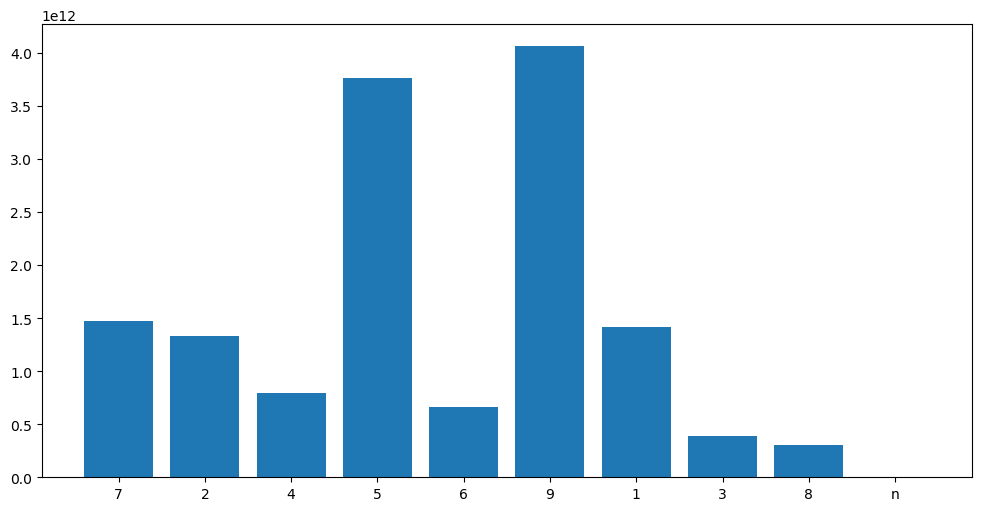

In [21]:
df["20VA"] = df["20Productivity"] * df["20TAH082"] *1000
df["industry"] = df["sector"].astype(str).str[0:1]

<BarContainer object of 5 artists>

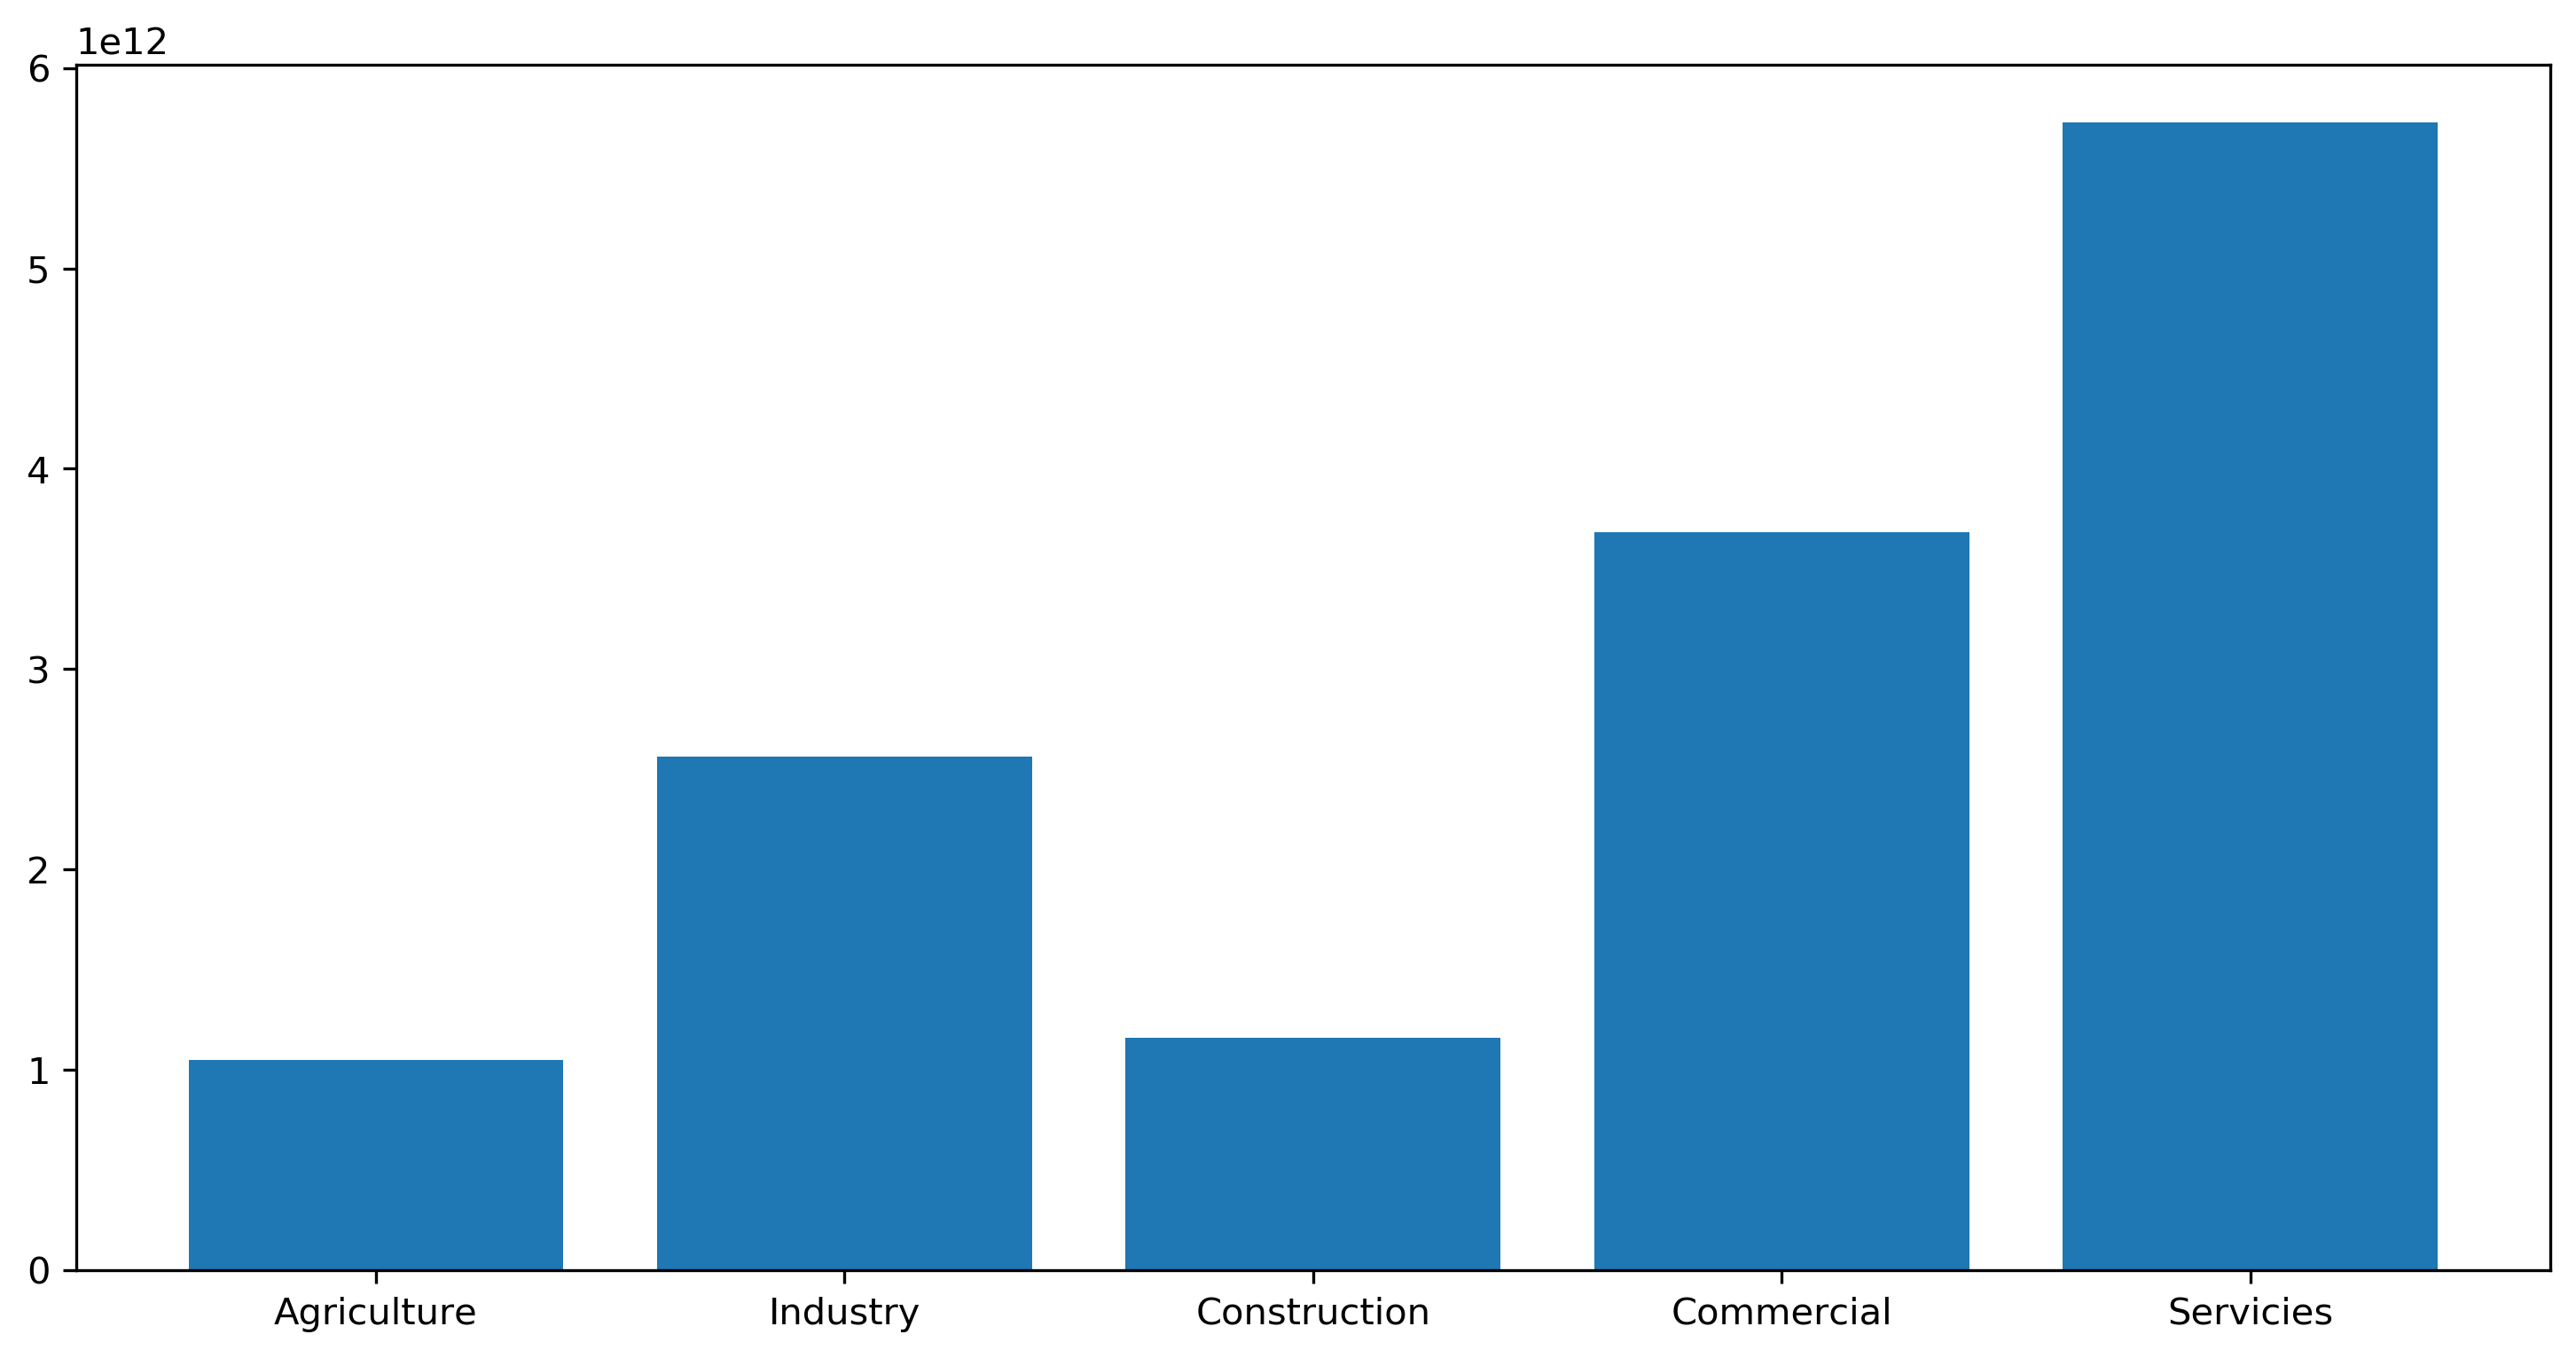

In [70]:
figure(figsize=(12, 6), dpi=300)
plt.bar(x=["Agriculture", "Industry", "Construction", "Commercial", "Servicies"], height=notNull[sectors].sum())

<BarContainer object of 5 artists>

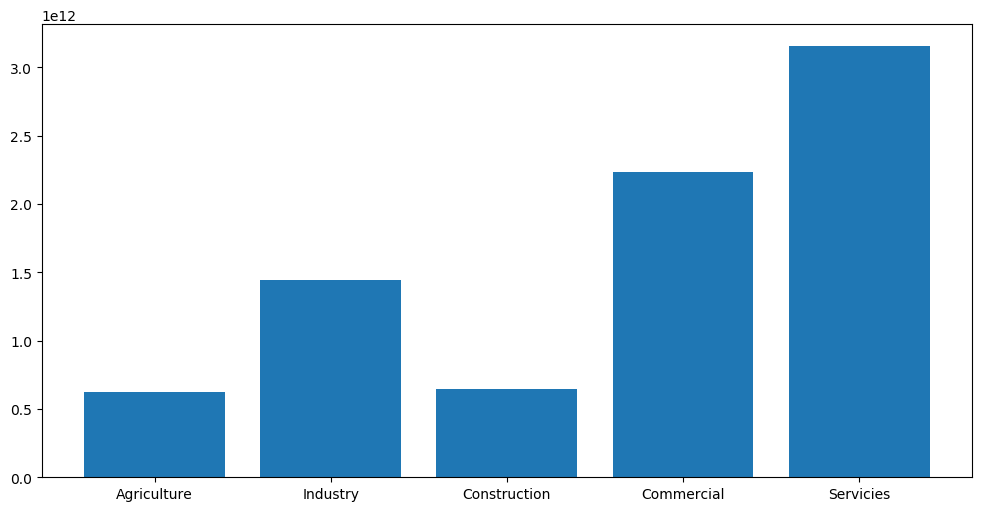

In [71]:
figure(figsize=(12, 6), dpi=100)
plt.bar(x=["Agriculture", "Industry", "Construction", "Commercial", "Servicies"], height=notNull[sectors14].sum())

In [87]:
notNull[sectors14].sum().sum()

8106835329000.0

In [80]:
prodInTime = pd.DataFrame()
for i in range(14, 21): 
    prodInTime[str(i)] = notNull[str(i)+"Productivity"]
prodInTime = TimeSeriesScalerMeanVariance().fit_transform(prodInTime)

timeSeriesClusterModel = TimeSeriesKMeans(n_clusters=8, metric="dtw", max_iter=10, random_state=15)
timeSeriesClusterModel.fit(prodInTime)
targetLabels = timeSeriesClusterModel.predict(prodInTime)

In [81]:
clusters = [1, 3, 4, 7]
grow = []
for i in clusters:
    grow.append(sum(notNull[targetLabels==i]["20VA"] - notNull[targetLabels==i]["14VA"]))